In [33]:
import numpy as np #for mathematical calculations
import pandas as pd
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For plotting graphs
import warnings #To ignore the warnings
warnings.filterwarnings("ignore")

In [34]:
train = pd.read_csv("merged_5s.csv")

In [35]:
train_original = train.copy()

In [36]:
train.columns

Index(['Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean',
       ' Idle Std', ' Idle Max', ' Idle Min', 'label'],
      dtype='object')

In [37]:
train.dtypes

Source IP             object
 Source Port         float64
 Destination IP       object
 Destination Port    float64
 Protocol            float64
 Flow Duration       float64
 Flow Bytes/s        float64
 Flow Packets/s      float64
 Flow IAT Mean       float64
 Flow IAT Std        float64
 Flow IAT Max        float64
 Flow IAT Min        float64
Fwd IAT Mean         float64
 Fwd IAT Std         float64
 Fwd IAT Max         float64
 Fwd IAT Min         float64
Bwd IAT Mean         float64
 Bwd IAT Std         float64
 Bwd IAT Max         float64
 Bwd IAT Min         float64
Active Mean          float64
 Active Std          float64
 Active Max          float64
 Active Min          float64
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
label                 object
dtype: object

In [38]:
train.shape

(84194, 29)

In [39]:
train['label'].value_counts()

nonTOR    69679
TOR       14507
Name: label, dtype: int64

In [40]:
train.drop(train.tail(8).index,inplace=True)

In [41]:
train['label'].value_counts(normalize=True)

nonTOR    0.827679
TOR       0.172321
Name: label, dtype: float64

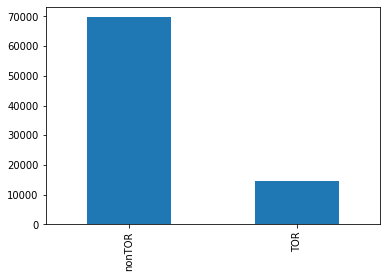

In [42]:
train['label'].value_counts().plot.bar()

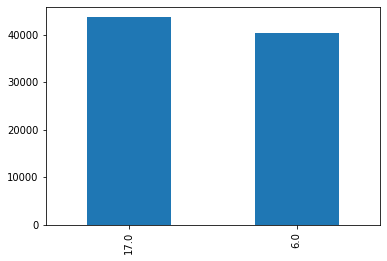

In [43]:
train[' Protocol'].value_counts().plot.bar()

In [44]:
train.isnull().sum()

Source IP            0
 Source Port         0
 Destination IP      0
 Destination Port    0
 Protocol            0
 Flow Duration       0
 Flow Bytes/s        0
 Flow Packets/s      0
 Flow IAT Mean       0
 Flow IAT Std        0
 Flow IAT Max        0
 Flow IAT Min        0
Fwd IAT Mean         0
 Fwd IAT Std         0
 Fwd IAT Max         0
 Fwd IAT Min         0
Bwd IAT Mean         0
 Bwd IAT Std         0
 Bwd IAT Max         0
 Bwd IAT Min         0
Active Mean          0
 Active Std          0
 Active Max          0
 Active Min          0
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
label                0
dtype: int64

In [45]:
def f(row):
    if row[' Protocol']==6:
        val=0
    else:
        val=1
    return val
train[' Protocol'] = train.apply(f,axis=1)

In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train["label"] = label_encoder.fit_transform(train["label"])

In [47]:
def n(row):
 if row['label']==1:
     val=0
 else:
     val=1
 return val
train['label'] = train.apply(n,axis=1)

In [48]:
X = train.drop(['Source IP',' Source Port',' Destination IP',' Destination Port', 'label'],axis = 1)
Y = train.label

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pred_cv = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, pred_cv)


0.652492227459633

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test, y_pred)

0.9687464224384659

In [53]:
import tensorflow as tf
from keras.layers import Dense

In [54]:
from keras import backend as K
def f1(y_true, y_pred):
 def recall(y_true, y_pred):
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
     recall = true_positives / (possible_positives + K.epsilon())
     return recall
 def precision(y_true, y_pred):
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
     precision = true_positives / (predicted_positives + K.epsilon())
     return precision
 precision = precision(y_true, y_pred)
 recall = recall(y_true, y_pred)
 return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [56]:
INPUT_DIM = X_train.shape[1]
batch_size = 128
epochs = 50
print (INPUT_DIM)

24


In [57]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(10, kernel_initializer = 'uniform', input_dim=INPUT_DIM, activation='relu'))
model.add(Dense(10, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(10, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(10, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(10, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1,kernel_initializer = 'uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
58930/58930 [==============================] - 1s 12us/step - loss: 0.3642 - f1: 0.0000e+00
Epoch 2/50
58930/58930 [==============================] - 0s 8us/step - loss: 0.1870 - f1: 0.7063
Epoch 3/50
58930/58930 [==============================] - 0s 8us/step - loss: 0.1597 - f1: 0.7906
Epoch 4/50
58930/58930 [==============================] - 0s 8us/step - loss: 0.1509 - f1: 0.8041
Epoch 5/50
58930/58930 [==============================] - 0s 8us/step - loss: 0.1402 - f1: 0.8137
Epoch 6/50
58930/58930 [==============================] - 1s 9us/step - loss: 0.1329 - f1: 0.8235
Epoch 7/50
58930/58930 [==============================] - 0s 8us/step - loss: 0.1272 - f1: 0.8364
Epoch 8/50
58930/58930 [==============================] - 0s 8us/step - loss: 0.1238 - f1: 0.8447
Epoch 9/50
58930/58930 [==============================] - 0s 8us/step - loss: 0.1211 - f1: 0.8497
Epoch 10/50
58930/58930 [==============================] - 0s 8us/step - loss: 0.1194 - f1: 0.8553
Epoch 11/50
58

In [58]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)

In [59]:
y_pred =(y_pred>0.5)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20440   435]
 [  431  3950]]


In [61]:
test_f1score_val = f1_score(y_test, y_pred)
print(test_f1score_val)

0.9012092174309834


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20875
           1       0.90      0.90      0.90      4381

    accuracy                           0.97     25256
   macro avg       0.94      0.94      0.94     25256
weighted avg       0.97      0.97      0.97     25256

